# Displaying a Pipeline with a Preprocessing Step and Classifier

In [11]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
steps = [
     ("preprocessing", StandardScaler()),
     ("calssifier", LogisticRegression())
]
pipe = Pipeline(steps)

In [12]:
set_config(display='diagram')
pipe

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('calssifier', LogisticRegression())])

In [13]:
set_config(display='text')
pipe

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('calssifier', LogisticRegression())])

# Displaying a Pipeline Chaining Multiple Preprocessing Steps and Classifier

In [14]:
from sklearn.preprocessing import  PolynomialFeatures, StandardScaler
Steps = [
     ("standard_scaler", StandardScaler()),
     ("polynomial", PolynomialFeatures(degree=3)),
     ("calssifier", LogisticRegression(C=2.0))
]
set_config(display='diagram')
Pipe = Pipeline(Steps)
Pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('calssifier', LogisticRegression(C=2.0))])

# Displaying a Pipeline and Dimensionality Reduction and Classifier

In [17]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

steps = [("reduce_dim", PCA(n_components=4)), ("classifier", SVC(kernel="linear"))]
pipe = Pipeline(steps)
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('reduce_dim', PCA(n_components=4)),
                ('classifier', SVC(kernel='linear'))])

# Displaying a Complex Pipeline Chaining a Column Transformer

In [18]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ["state", "gender"]),
        ("numerical", numeric_preprocessor, ["age", "weight"]),
    ]
)

pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state', 'gender']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'weight'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

# Displaying a Grid Search over a Pipeline with a Classifier

In [19]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ["state", "gender"]),
        ("numerical", numeric_preprocessor, ["age", "weight"]),
    ]
)

pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())]
)

param_grid = {
    "classifier__n_estimators": [200, 500],
    "classifier__max_features": ["auto", "sqrt", "log2"],
    "classifier__max_depth": [4, 5, 6, 7, 8],
    "classifier__criterion": ["gini", "entropy"],
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, n_jobs=1)
grid_search  # click on the diagram below to see the details of each step

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputation_constant',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['state',
                                                                          'gender']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('imputation_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'weight'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [4, 5, 6, 7, 8],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__n_estimators': [200, 500]})

In [9]:
import pandas as pd

# Load the data
data = pd.read_csv(r"C:\Users\mk744\Downloads\Telegramer data\Complete Orders Details..  (6).csv")  # Replace with your file name

# Display the first few rows to understand the structure
data.head()

# Group data by user to calculate summary metrics
user_report = data.groupby(['User name', 'camp Name', 'action_date']).agg(
    Total_Orders=('ID', 'count'),      # Assuming 'Order ID' uniquely identifies each order
    Total_Payout=('point_post_payout', 'sum'),    # Assuming 'Total Payout' holds payout information
    Avg_Payout=('point_post_payout', 'mean')      # Calculate the average payout per order
).reset_index()

# Sort the report by total payout in descending order
user_report = user_report.sort_values(by='Total_Payout', ascending=False)

# Display the report
user_report


,User name,camp Name,action_date,Total_Orders,Total_Payout,Avg_Payout
2,Shahnawaz Khan,Flipkart [CPS] IN,28-10-2024,211,1921,9.104265
3,Shahnawaz Khan,Flipkart [CPS] IN,29-10-2024,143,1204,8.419580
1,Shahnawaz Khan,Flipkart [CPS] IN,27-10-2024,10,56,5.600000
0,Shahnawaz Khan,Amazon India,27-10-2024,1,13,13.000000


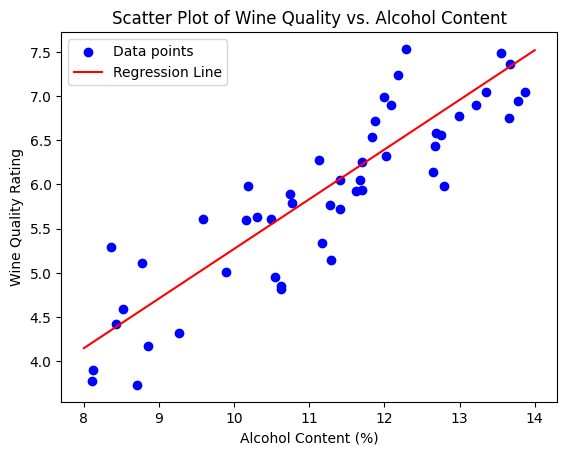

Interpretation: For every 1% increase in alcohol content, the wine quality rating is predicted to increase by approximately 0.5624.
Predicted quality for wine with 10% alcohol content: 5.2711
Conclusion: The positive slope indicates a positive relationship between alcohol content and wine quality.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generating synthetic data for illustration
np.random.seed(0)
alcohol_content = np.random.uniform(8, 14, 50)  # Random alcohol content between 8% and 14%
# Using the given model equation: quality = -0.3529 + 0.5624 * alcohol_content + noise
quality = -0.3529 + 0.5624 * alcohol_content + np.random.normal(0, 0.5, 50)

# Creating a DataFrame
data = pd.DataFrame({
    'Alcohol_Content': alcohol_content,
    'Quality': quality
})

# Saving data to an Excel file
data.to_excel("wine_data.xlsx", index=False)

# Part (a): Scatter plot
plt.scatter(data['Alcohol_Content'], data['Quality'], color='blue', label='Data points')
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Wine Quality Rating")
plt.title("Scatter Plot of Wine Quality vs. Alcohol Content")

# Plotting the regression line based on b0 and b1
x_vals = np.array([8, 14])
y_vals = -0.3529 + 0.5624 * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.legend()
plt.show()

# Part (b): Interpretation of the slope
print("Interpretation: For every 1% increase in alcohol content, the wine quality rating is predicted to increase by approximately 0.5624.")

# Part (c): Predicting mean wine quality for 10% alcohol content
predicted_quality_10_percent = -0.3529 + 0.5624 * 10
print(f"Predicted quality for wine with 10% alcohol content: {predicted_quality_10_percent:.4f}")

# Part (d): Conclusion
print("Conclusion: The positive slope indicates a positive relationship between alcohol content and wine quality.")


In [14]:
data.head()

,Rating_Sum,Cost_per_Person
0,56.433096,32.667965
1,47.438186,16.486102
2,56.452061,43.637568
3,50.775948,30.788964
4,51.757628,35.277433


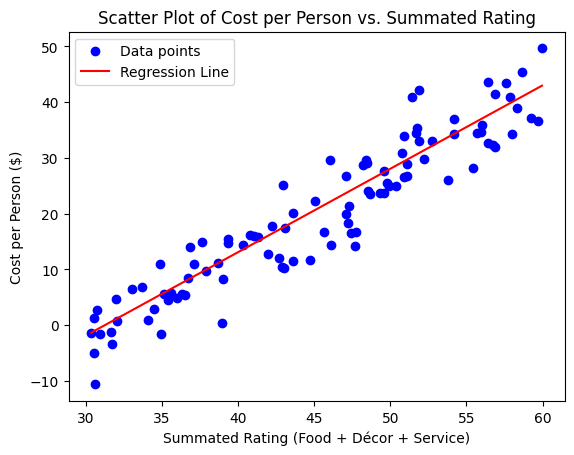

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is a DataFrame with columns 'Rating_Sum' and 'Cost_per_Person'
# Uncomment and populate `data` with actual values if available
# # Sample data generation (if actual data were available)
ratings_sum = np.random.uniform(30, 60, 100)  # Random rating sums
cost_per_person = -46.7718 + 1.4963 * ratings_sum + np.random.normal(0, 5, 100)
data = pd.DataFrame({'Rating_Sum': ratings_sum, 'Cost_per_Person': cost_per_person})

# Scatter plot
plt.scatter(data['Rating_Sum'], data['Cost_per_Person'], color='blue', label='Data points')
plt.xlabel("Summated Rating (Food + Décor + Service)")
plt.ylabel("Cost per Person ($)")
plt.title("Scatter Plot of Cost per Person vs. Summated Rating")

# Plotting the regression line based on b0 and b1
x_vals = np.array([min(data['Rating_Sum']), max(data['Rating_Sum'])])
y_vals = -46.7718 + 1.4963 * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.legend()
plt.show()


In [18]:
x_vals, y_vals

(array([30.35142253, 59.9654102 ]), array([-1.35696648, 42.95444328]))

In [16]:
data.head()

,Rating_Sum,Cost_per_Person
0,56.433096,32.667965
1,47.438186,16.486102
2,56.452061,43.637568
3,50.775948,30.788964
4,51.757628,35.277433
